In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv

import pickle
import itertools
import matplotlib.pyplot as plt
import numpy as np

from AutoEncoder import AE, get_loader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [13]:
params = {
    # model
    "linear": False,
    "bias": False,
    "last-linear": False,
    "layers": [784,10,1],

    # training
    "lr": 1e-3,
    "epochs": 40,
    "iterations": 5,
    "optimizer": optim.Adam,
    "criterion": nn.MSELoss(reduction='mean'),
    "hidden_sizes": [[500],[1000],[2000],[1000,500],[2000,1000],[2000,1000,500],[2000,1000,500,300],[2000,1000,500,300,100]],
    "code_lengths": [1,2,3,4,5],
    "batch_sizes": [10,100,500,1000],
    "activation_types": ["ReLU","linear"],

    # misc
    "verbose": False,
    "device": device,
}

params.update({
    "code_lengths": [1,2,3],
    "batch_sizes": [100],
    "activation_types": ["ReLU"],
    #"hidden_sizes": [[10],[20]],
    #"epochs": 3,
    #"iterations": 2,
})

training samples: 60000


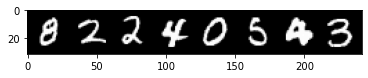

In [6]:
# load and visualize the data

set0 = tv.datasets.MNIST("../MNIST/", 
                         download=True, 
                         train = True,
                         transform = tv.transforms.ToTensor())
loader0 = get_loader(set0, len(set0))

print("training samples: " + str(len(set0)))

def imshow(img):
    npimg = img.numpy()
    plt.imshow((np.transpose(npimg, (1, 2, 0))*255).astype(np.uint8))

dataiter = iter(loader0)
image, _ = dataiter.next()

imshow(tv.utils.make_grid(image[:8]))
plt.show()

In [14]:
activation_type = "ReLU"

print(activation_type)
params['linear'] = (activation_type == "linear")
for batch in params['batch_sizes']:
    print("Batch size: {}".format(batch))
    for code in params['code_lengths']:
        for hidden in params['hidden_sizes']:
            params['layers'] = [784] + hidden + [code]
            shape = hidden+[code]+list(reversed(hidden))+[784]
            print("shape: \n{}".format(shape))
            print("ranks:")
            name = "AE-{}-Adam-L{}-B{}".format(activation_type, params['layers'][1:], batch)
            with open("models/"+name+"_activations", "rb") as fp:
                Phi = pickle.load(fp)

            for l in range(len(Phi)):
                print(Phi[l])
            print("\n")
                    

ReLU
Batch size: 100
shape: 
[500, 1, 500, 784]
ranks:
[2, 1, 1, 1]
[2, 1, 1, 1]
[2, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]


shape: 
[1000, 1, 1000, 784]
ranks:
[2, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]


shape: 
[2000, 1, 2000, 784]
ranks:
[185, 0, 0, 0]
[178, 0, 0, 0]
[190, 0, 0, 0]
[180, 0, 0, 0]
[173, 0, 0, 0]


shape: 
[1000, 500, 1, 500, 1000, 784]
ranks:
[5, 3, 1, 1, 1, 1]
[7, 2, 1, 1, 1, 1]
[3, 2, 1, 1, 1, 1]
[3, 3, 1, 1, 1, 1]
[2, 2, 1, 1, 1, 1]


shape: 
[2000, 1000, 1, 1000, 2000, 784]
ranks:
[2, 2, 1, 1, 1, 1]
[3, 2, 1, 1, 1, 1]
[2, 2, 1, 1, 1, 1]
[4, 2, 1, 1, 1, 1]
[7, 2, 1, 1, 1, 1]


shape: 
[2000, 1000, 500, 1, 500, 1000, 2000, 784]
ranks:
[14, 1, 1, 1, 1, 1, 1, 1]
[11, 1, 1, 1, 1, 1, 1, 1]
[5, 2, 1, 1, 1, 1, 1, 1]
[6, 2, 1, 1, 1, 1, 1, 1]
[4, 2, 1, 1, 1, 1, 1, 1]


shape: 
[2000, 1000, 500, 300, 1, 300, 500, 1000, 2000, 784]
ranks:
[3, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[8, 3, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[11, 2, 1, 1, 1, 1, 1, 1, 

ReLU
Batch size: 100


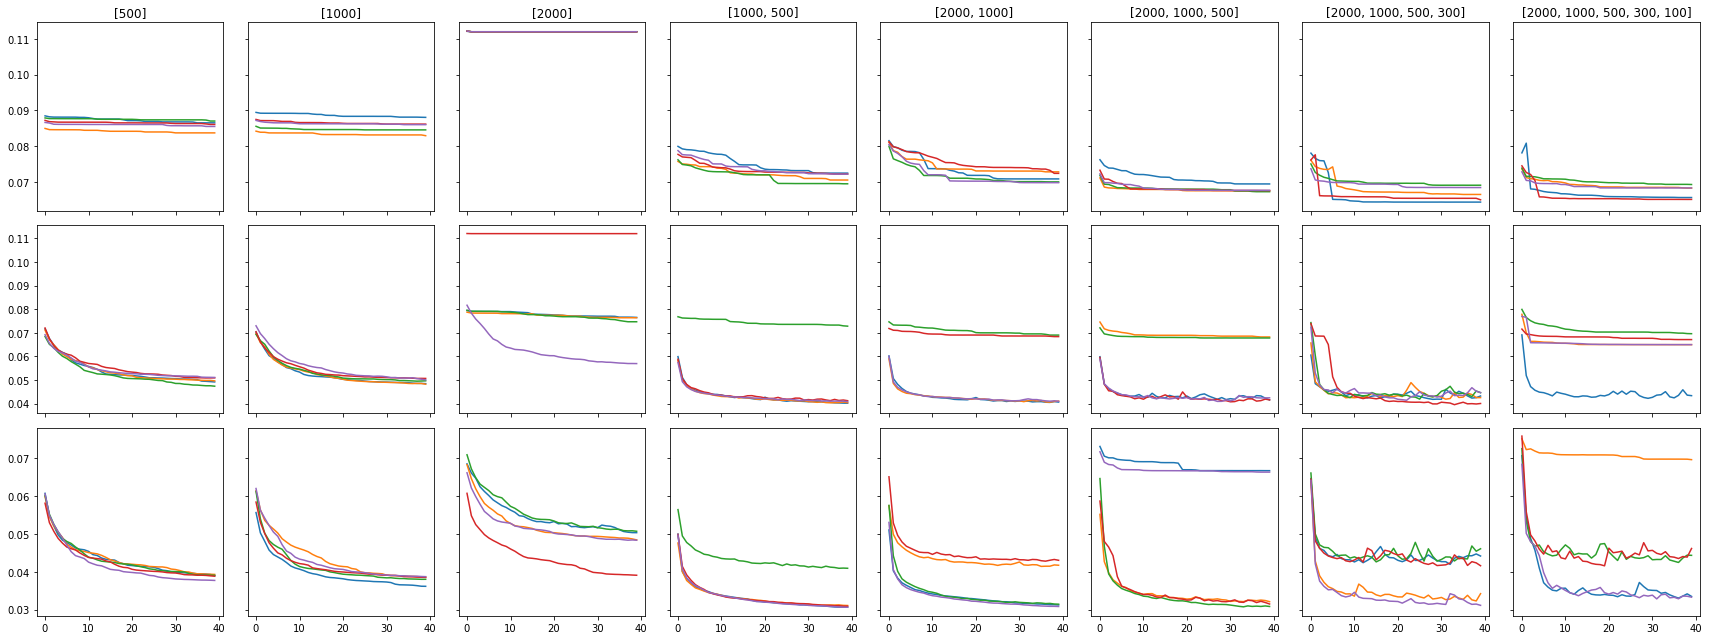

In [15]:
# params['epochs'] = 40
# code_lengths = [1]
# batch_sizes = [10,100,1000]
# hidden_sizes = [[10],[50],[100],[500],[1000],[2000],[1000,500]]

x = np.arange(0, params['epochs'], 1)

for activation_type in params['activation_types']:
    print(activation_type)
    params['linear'] = (activation_type == "linear")
    for batch in params['batch_sizes']:
        print("Batch size: {}".format(batch))
        fig, axs = plt.subplots(len(params['code_lengths']), len(params['hidden_sizes']),
                                figsize=(len(params['hidden_sizes'])*3,len(params['code_lengths'])*3),
                                sharex='col', sharey='row')
        for i, code in enumerate(params['code_lengths']):
            for j, hidden in enumerate(params['hidden_sizes']):
                params['layers'] = [784] + hidden + [code]
                shape = [784] + hidden+[code]+list(reversed(hidden))+[784]
                name = "AE-{}-Adam-L{}-B{}".format(activation_type, params['layers'][1:], batch)
                with open("models/"+name+"_history", "rb") as fp:
                    H = pickle.load(fp)

                for k, h in enumerate(H):
                    axs[i,j].plot(x, h, label = k)
                if i==0:
                    axs[i,j].set_title(str(hidden))

        fig.tight_layout()

        name = "AE-{}-Adam-B{}".format(activation_type, batch)
        plt.savefig("plots/AE-" + name + ".png")
        plt.show()

In [12]:
params['epochs'] = 40
code_lengths = [1]
batch_sizes = [10,100,1000]
hidden_sizes = [[10],[50],[100],[500],[1000],[2000],[1000,500]]

activation_type = "linear"
print(activation_type)
params['linear'] = (activation_type == "linear")
for batch in batch_sizes:
    print("Batch size: {}".format(batch))
    for code in code_lengths:
        for hidden in hidden_sizes:
            params['layers'] = [784] + hidden + [code]
            shape = hidden+[code]+list(reversed(hidden))+[784]
            print("shape: \n{}".format(shape))
            print("ranks:")
            name = "AE-{}-Adam-L{}-B{}".format(activation_type, params['layers'][1:], batch)
            with open("models/"+name+"_activations", "rb") as fp:
                Phi = pickle.load(fp)

            for l in range(len(Phi)):
                print(Phi[l])
            print("\n")
                    

linear
Batch size: 10
shape: 
[10, 1, 10, 784]
ranks:
[10, 1, 1, 1]
[10, 1, 1, 1]
[10, 1, 1, 1]
[10, 1, 1, 1]


shape: 
[50, 1, 50, 784]
ranks:
[50, 1, 1, 1]
[50, 1, 1, 1]
[50, 1, 1, 1]
[50, 1, 1, 1]


shape: 
[100, 1, 100, 784]
ranks:
[100, 1, 1, 1]
[100, 1, 1, 1]
[100, 1, 1, 1]
[100, 1, 1, 1]


shape: 
[500, 1, 500, 784]
ranks:
[309, 1, 1, 1]
[341, 1, 1, 1]
[309, 1, 1, 1]
[339, 1, 1, 1]


shape: 
[1000, 1, 1000, 784]
ranks:
[428, 1, 1, 1]
[427, 1, 1, 1]
[429, 1, 1, 1]
[432, 1, 1, 1]


shape: 
[2000, 1, 2000, 784]
ranks:
[454, 1, 1, 1]
[477, 1, 1, 1]
[403, 1, 1, 1]
[450, 1, 1, 1]


shape: 
[1000, 500, 1, 500, 1000, 784]
ranks:
[267, 215, 1, 1, 1, 1]
[278, 212, 1, 1, 1, 1]
[374, 304, 1, 1, 1, 1]
[273, 231, 1, 1, 1, 1]


Batch size: 100
shape: 
[10, 1, 10, 784]
ranks:
[10, 1, 1, 1]
[10, 1, 1, 1]
[10, 1, 1, 1]
[10, 1, 1, 1]


shape: 
[50, 1, 50, 784]
ranks:
[50, 1, 1, 1]
[50, 1, 1, 1]
[50, 1, 1, 1]
[50, 1, 1, 1]


shape: 
[100, 1, 100, 784]
ranks:
[100, 1, 1, 1]
[100, 1, 1, 1]
[100, 1, 1

linear
Batch size: 10
shape: [784, 10, 1, 10, 784]


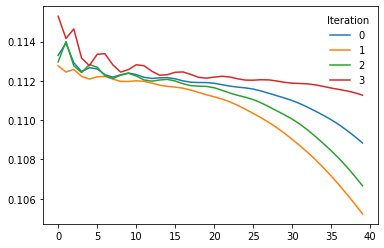

shape: [784, 50, 1, 50, 784]


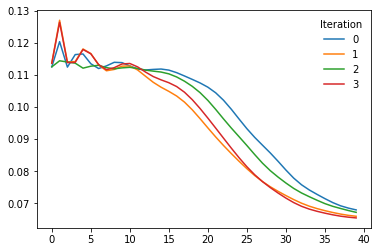

shape: [784, 100, 1, 100, 784]


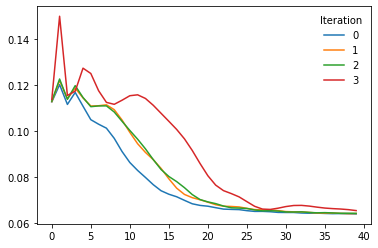

shape: [784, 500, 1, 500, 784]


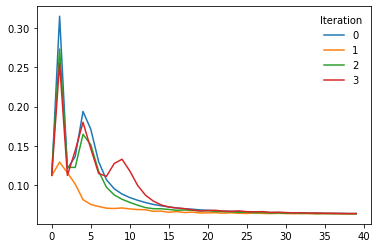

shape: [784, 1000, 1, 1000, 784]


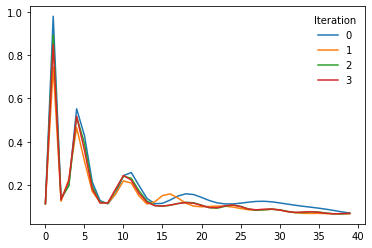

shape: [784, 2000, 1, 2000, 784]


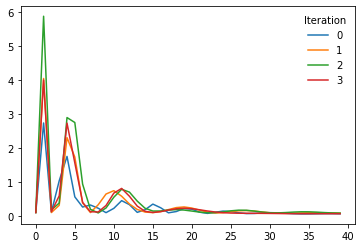

shape: [784, 1000, 500, 1, 500, 1000, 784]


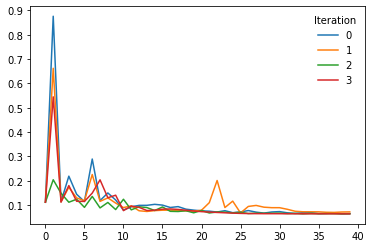

Batch size: 100
shape: [784, 10, 1, 10, 784]


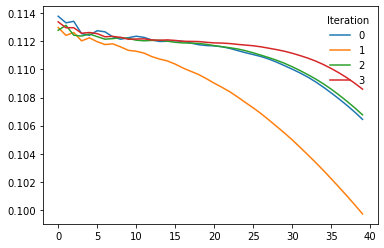

shape: [784, 50, 1, 50, 784]


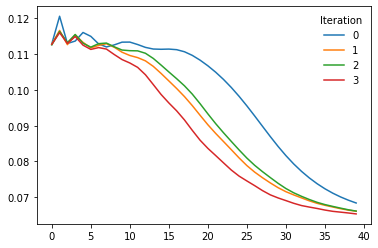

shape: [784, 100, 1, 100, 784]


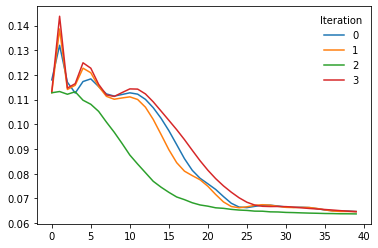

shape: [784, 500, 1, 500, 784]


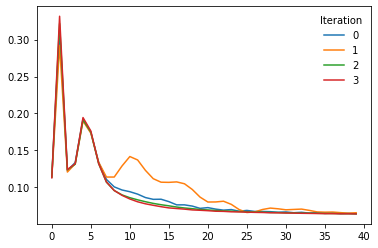

shape: [784, 1000, 1, 1000, 784]


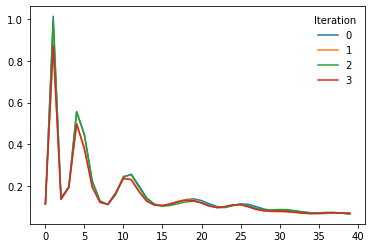

shape: [784, 2000, 1, 2000, 784]


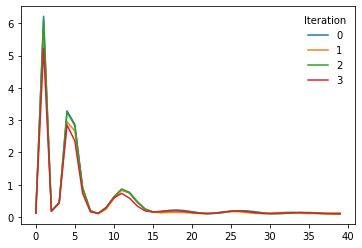

shape: [784, 1000, 500, 1, 500, 1000, 784]


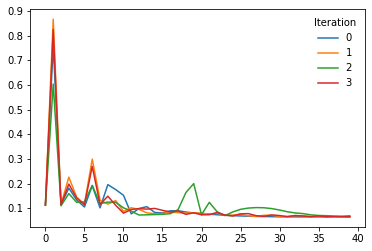

Batch size: 1000
shape: [784, 10, 1, 10, 784]


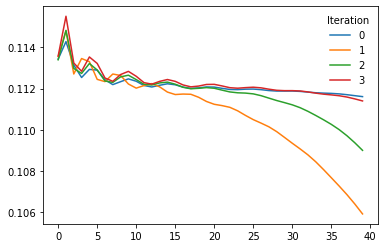

shape: [784, 50, 1, 50, 784]


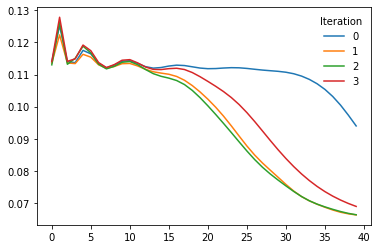

shape: [784, 100, 1, 100, 784]


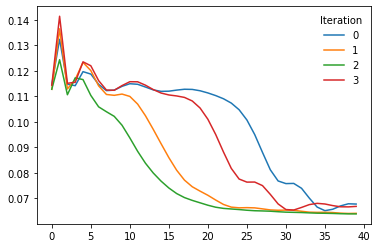

shape: [784, 500, 1, 500, 784]


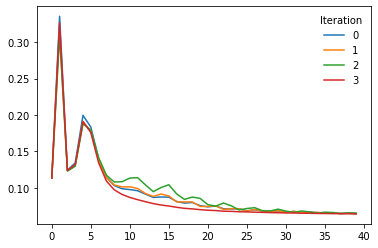

shape: [784, 1000, 1, 1000, 784]


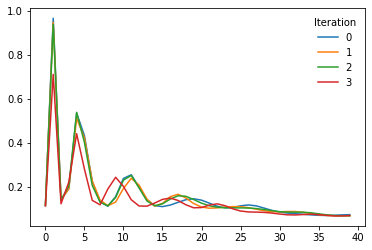

shape: [784, 2000, 1, 2000, 784]


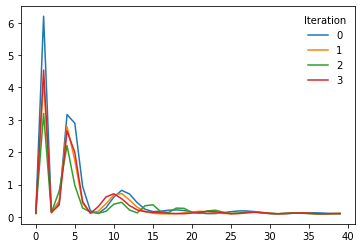

shape: [784, 1000, 500, 1, 500, 1000, 784]


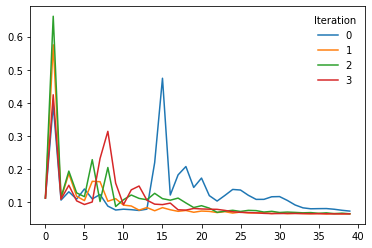

In [20]:
# params['epochs'] = 40
# code_lengths = [1]
# batch_sizes = [10,100,1000]
# hidden_sizes = [[10],[50],[100],[500],[1000],[2000],[1000,500]]

x = np.arange(0, params['epochs'], 1)
activation_type = "linear"
print(activation_type)

params['linear'] = (activation_type == "linear")
for batch in batch_sizes:
    print("Batch size: {}".format(batch))
    for code in code_lengths:
        for hidden in hidden_sizes:
            params['layers'] = [784] + hidden + [code]
            shape = [784] + hidden+[code]+list(reversed(hidden))+[784]
            print("shape: {}".format(shape))
            name = "AE-{}-Adam-L{}-B{}".format(activation_type, params['layers'][1:], batch)
            with open("models/"+name+"_history", "rb") as fp:
                H = pickle.load(fp)

            for i,h in enumerate(H):
                plt.plot(x, h, label = i)
            plt.legend(loc="upper right", title="Iteration", frameon=False)
            plt.savefig("plots/AE-" + name + ".png")
            plt.show()